## Model

In [1]:
!nvidia-smi

Mon Jul 12 12:34:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from torchsummary import summary

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
x=[[1,2],[3,4],[5,6],[7,8],[9,10],[11,12]]
y=[[3],[7],[11],[15],[19],[23]]

In [5]:
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x=torch.tensor(x).float().to(device)
    self.y=torch.tensor(y).float().to(device)
  def __len__(self):
    return len(self.x)
  def __getitem__(self, ix):
    return self.x[ix], self.y[ix]

In [6]:
ds=MyDataset(x, y)
dl=DataLoader(ds, batch_size=3, shuffle=True)

In [7]:
model=nn.Sequential(nn.Linear(2, 8), nn.ReLU(), nn.Linear(8, 1)).to(device)

In [8]:
summary(model, ([[1, 2]]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [9]:
loss_func=nn.MSELoss()
from torch.optim import SGD

In [10]:
opt=SGD(model.parameters(), lr=0.001)
loss_history=[]

In [11]:
for epochs in range(50):
  for data in dl:
    x, y=data
    opt.zero_grad()
    loss_value=loss_func(model(x), y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value)

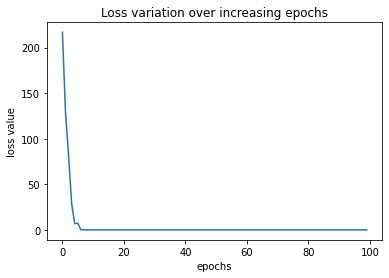

In [12]:
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.show()

## Predictions

In [13]:
Pred_val=[[20, 22]]
Pred_val=torch.tensor(Pred_val).float().to(device)
print(Pred_val)

tensor([[20., 22.]], device='cuda:0')


In [14]:
output=model(Pred_val)
print(output)

tensor([[42.1926]], device='cuda:0', grad_fn=<AddmmBackward>)
